<a href="https://colab.research.google.com/github/musakhan18/Side-projects/blob/main/Skin_Cancer_ISIC_2019(AlexNet%2C_Xception%2C_Vgg16%2C_ResNet%2C_DenseNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Dataset link: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic

# **Importing data**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"musakhan20","key":"c58992334667230e68c8e82ec4019f3c"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

 99% 774M/786M [00:08<00:00, 102MB/s] 
100% 786M/786M [00:08<00:00, 91.6MB/s]


In [ ]:
!unzip skin-cancer9-classesisic.zip

In [ ]:
import os
from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_path = Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
test_path = Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

# Data Loading


In [ ]:
# import dependencies you will need to build your model
import os
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [ ]:
batch_size = 32
img_height = 128
img_width = 128
img_size=(img_width,img_height)
learning_rate = 1e-4
directory = train_path

In [ ]:
# Perform augmentation and validation split here
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               validation_split=0.2)
# Notice here that the test and validation generator are not augmented
val_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
# Initialize the generator and read from directory
train_ds = train_gen.flow_from_directory(directory,
                                         target_size=(128,128),
                                         batch_size=batch_size,
                                         class_mode = 'categorical', # binary if two classes, if multiple class us 'categorical'
                                         subset='training')
valid_ds = val_datagen.flow_from_directory(directory,
                                         target_size=(128,128),
                                         batch_size=batch_size,
                                         class_mode = 'categorical',
                                         subset='validation')

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


# **AlexNet**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras import activations
from keras.layers import Flatten, Dense, Dropout

## Model

In [ ]:
AlexNet = keras.Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(128,128,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(layers.Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(layers.Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(layers.Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(layers.Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(layers.Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(layers.Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(layers.Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(layers.Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
#AlexNet.add(Dense(7))
AlexNet.add(BatchNormalization())
#AlexNet.add(Activation('softmax'))
AlexNet.add(Dense(9, activation='softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 96)       384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 256)      1

## Compiling the model

In [ ]:
# Compile the model
AlexNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=[tf.keras.metrics.categorical_accuracy]
    )

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## Training the model

In [ ]:
# Train the model
callbacksX = [EarlyStopping(patience = 10), 
              ModelCheckpoint("./ISIC/model-alexnet-{epoch:02d}.h5", monitor='val_loss',
                               verbose=1, save_best_only=True),
              ReduceLROnPlateau(monitor='val_loss',
                                factor=0.1, patience=5, min_lr=1e-6)] 
history_alexnet=AlexNet.fit(train_ds, epochs=100, validation_data=valid_ds, verbose=2, callbacks=callbacksX,steps_per_epoch = 1795 // batch_size,
                              validation_steps = 444 // batch_size)


Epoch 1/100

Epoch 1: val_loss improved from inf to 2.12377, saving model to ./ISIC/model-alexnet-01.h5
56/56 - 49s - loss: 2.3348 - categorical_accuracy: 0.2876 - val_loss: 2.1238 - val_categorical_accuracy: 0.2115 - lr: 1.0000e-04 - 49s/epoch - 871ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 2.12377
56/56 - 39s - loss: 2.1860 - categorical_accuracy: 0.3318 - val_loss: 2.2463 - val_categorical_accuracy: 0.2067 - lr: 1.0000e-04 - 39s/epoch - 698ms/step
Epoch 3/100

Epoch 3: val_loss improved from 2.12377 to 2.04515, saving model to ./ISIC/model-alexnet-03.h5
56/56 - 38s - loss: 2.0297 - categorical_accuracy: 0.3704 - val_loss: 2.0452 - val_categorical_accuracy: 0.3101 - lr: 1.0000e-04 - 38s/epoch - 674ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 2.04515
56/56 - 36s - loss: 2.0181 - categorical_accuracy: 0.3749 - val_loss: 2.5495 - val_categorical_accuracy: 0.2091 - lr: 1.0000e-04 - 36s/epoch - 645ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 

## Testing the model

In [ ]:
# Test model
directory = test_path

test_gen = ImageDataGenerator(rescale=1./255) 
test = test_gen.flow_from_directory(directory,
                                         target_size=(128,128),
                                         batch_size=32,
                                         class_mode = 'categorical')
# Evaluate on test data
scores = AlexNet.evaluate(test)
print("%s%s: %.2f%%" % ("evaluate ",AlexNet.metrics_names[1], scores[1]*100))

Found 118 images belonging to 9 classes.
4/4 [==============================] - 7s 2s/step - loss: 2.3632 - categorical_accuracy: 0.2881
evaluate categorical_accuracy: 28.81%


In [ ]:
from matplotlib import pyplot as plt

## Ploting graph

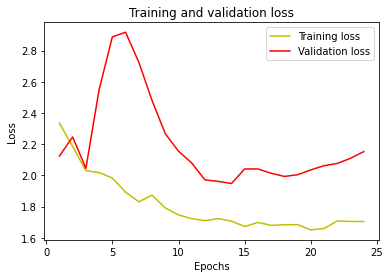

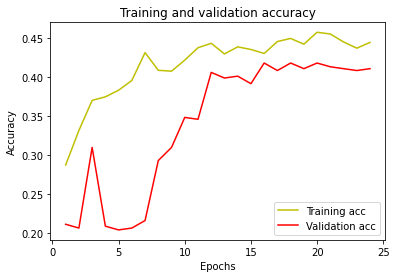

In [ ]:
loss = history_alexnet.history['loss']
val_loss = history_alexnet.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_alexnet.history['categorical_accuracy']
val_acc = history_alexnet.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Xception**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.applications import Xception

## Model

In [ ]:
def build_model(size, num_classes):
    inputs = layers.Input((size, size, 3))
    backbone = Xception(input_tensor=inputs, include_top=False, weights="imagenet")
    backbone.trainable = False
    x = backbone.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x) 
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.Dense(num_classes, activation="softmax")(x)

    model = tf.keras.Model(inputs, x)
    model.summary()
    return model

## Compiling the model

In [ ]:
# Compile the model
size = 128
num_classes=9
model_v1 = build_model(size, num_classes)
model_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=[tf.keras.metrics.categorical_accuracy]
    )

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

## Traing the model

In [ ]:
# Train the model
callbacksX = [EarlyStopping(patience = 10), 
              ModelCheckpoint("./ISIC/model-v1-{epoch:02d}.h5", monitor='val_loss',
                               verbose=1, save_best_only=True),
              ReduceLROnPlateau(monitor='val_loss',
                                factor=0.1, patience=5, min_lr=1e-7)] 
history_v1 = model_v1.fit(train_ds,validation_data=valid_ds, epochs=100, verbose=2, callbacks=callbacksX,steps_per_epoch = 1795 // batch_size,
                              validation_steps = 444 // batch_size)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.81384, saving model to ./ISIC/model-v1-01.h5
56/56 - 41s - loss: 1.8852 - categorical_accuracy: 0.3301 - val_loss: 1.8138 - val_categorical_accuracy: 0.3846 - lr: 1.0000e-04 - 41s/epoch - 727ms/step
Epoch 2/100

Epoch 2: val_loss improved from 1.81384 to 1.76821, saving model to ./ISIC/model-v1-02.h5
56/56 - 37s - loss: 1.6985 - categorical_accuracy: 0.4141 - val_loss: 1.7682 - val_categorical_accuracy: 0.3774 - lr: 1.0000e-04 - 37s/epoch - 657ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.76821 to 1.75109, saving model to ./ISIC/model-v1-03.h5
56/56 - 37s - loss: 1.5949 - categorical_accuracy: 0.4600 - val_loss: 1.7511 - val_categorical_accuracy: 0.3918 - lr: 1.0000e-04 - 37s/epoch - 656ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.75109 to 1.68618, saving model to ./ISIC/model-v1-04.h5
56/56 - 37s - loss: 1.5460 - categorical_accuracy: 0.4577 - val_loss: 1.6862 - val_categorical_accuracy: 0.4014 - lr: 1.0000e-04 -

## Testing the model

In [ ]:
# Test model
directory = test_path

test_gen = ImageDataGenerator(rescale=1./255) 
test = test_gen.flow_from_directory(directory,
                                         target_size=(128,128),
                                         batch_size=16,
                                         class_mode = 'categorical')
# Evaluate on test data
scores = model_v1.evaluate(test)
print("%s%s: %.2f%%" % ("evaluate ",model_v1.metrics_names[1], scores[1]*100))

Found 118 images belonging to 9 classes.
8/8 [==============================] - 7s 901ms/step - loss: 1.9119 - categorical_accuracy: 0.3305
evaluate categorical_accuracy: 33.05%


## Ploting graph

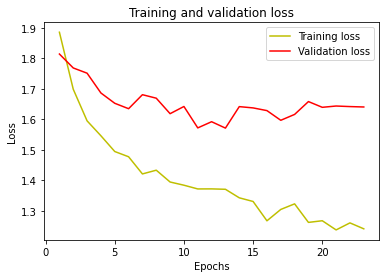

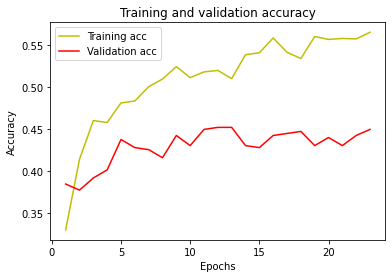

In [ ]:
loss = history_v1.history['loss']
val_loss = history_v1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_v1.history['categorical_accuracy']
val_acc = history_v1.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vvg = VGG16(input_shape=(128,128,3), include_top=False,weights = 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


## Model

In [ ]:
vgg = keras.Sequential()

# Add the ResNet50 convolutional base model
vgg.add(vvg)

# Add new layers
vgg.add(Flatten())
vgg.add(Dense(4096 , activation='relu'))
vgg.add(Dropout(0.5))
vgg.add(Dense(4096 , activation='relu'))
vgg.add(Dropout(0.3))
vgg.add(Dense(4096, activation='relu'))
vgg.add(Dropout(0.4))
vgg.add(Dense(9, activation='softmax'))

vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 4096)              33558528  
                                                                 
 dropout_9 (Dropout)         (None, 4096)              0         
                                                                 
 dense_15 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_10 (Dropout)        (None, 4096)              0         
                                                                 
 dense_16 (Dense)            (None, 4096)              1

## Compiling the model

In [ ]:
vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=[tf.keras.metrics.categorical_accuracy]
    )

## Training the model

In [ ]:
#Train the model
callbacksX = [EarlyStopping(patience = 10), 
              ModelCheckpoint("./ISIC/model-vgg16-{epoch:02d}.h5", monitor='val_loss',
                               verbose=1, save_best_only=True),
              ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1, patience=5, min_lr=1e-7)] 
history_vgg = vgg.fit(train_ds,validation_data=valid_ds, epochs=100, verbose=2,callbacks=callbacksX,steps_per_epoch = 1795 // batch_size,
                              validation_steps = 444 // batch_size)

Epoch 1/100

Epoch 1: val_loss improved from inf to 2.03062, saving model to ./ISIC/model-vgg16-01.h5
56/56 - 48s - loss: 2.1085 - categorical_accuracy: 0.1872 - val_loss: 2.0306 - val_categorical_accuracy: 0.2139 - lr: 1.0000e-04 - 48s/epoch - 856ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 2.03062
56/56 - 38s - loss: 2.0477 - categorical_accuracy: 0.1974 - val_loss: 2.0326 - val_categorical_accuracy: 0.2019 - lr: 1.0000e-04 - 38s/epoch - 682ms/step
Epoch 3/100

Epoch 3: val_loss improved from 2.03062 to 1.98132, saving model to ./ISIC/model-vgg16-03.h5
56/56 - 42s - loss: 2.0026 - categorical_accuracy: 0.2394 - val_loss: 1.9813 - val_categorical_accuracy: 0.2524 - lr: 1.0000e-04 - 42s/epoch - 744ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 1.98132
56/56 - 39s - loss: 1.7814 - categorical_accuracy: 0.3466 - val_loss: 1.9975 - val_categorical_accuracy: 0.3101 - lr: 1.0000e-04 - 39s/epoch - 689ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.98132 to 

## Testing the model

In [ ]:
# Test model
directory = test_path

test_gen = ImageDataGenerator(rescale=1./255) 
test = test_gen.flow_from_directory(directory,
                                         target_size=(128,128),
                                         batch_size=32,
                                         class_mode = 'categorical')
# Evaluate on test data
scores = vgg.evaluate(test)
print("%s%s: %.2f%%" % ("evaluate ",vgg.metrics_names[1], scores[1]*100))

Found 118 images belonging to 9 classes.
4/4 [==============================] - 8s 2s/step - loss: 1.8600 - categorical_accuracy: 0.3983
evaluate categorical_accuracy: 39.83%


## Ploting graph

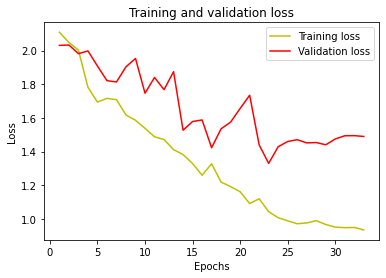

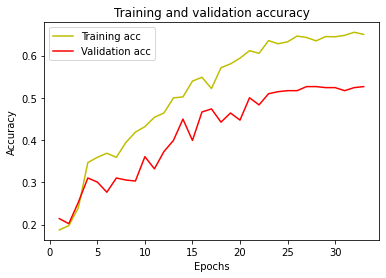

In [ ]:
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_vgg.history['categorical_accuracy']
val_acc = history_vgg.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#**ResNet**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras import activations
from keras.layers import Flatten, Dense, Dropout

## Model

In [ ]:
Inputs = layers.Input((128, 128, 3))
baseModel = ResNet50(weights="imagenet", include_top=False,input_tensor=Inputs)
model = baseModel.output
model = Flatten()(model)
model = Dense(128, activation="relu")(model)
model = Dropout(0.2)(model)
model = Dense(9, activation="softmax")(model)
model = tf.keras.Model(inputs=baseModel.input, outputs=model)
model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization

## Compiling the model

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) , 
              loss = tf.keras.losses.categorical_crossentropy, 
              metrics=[tf.keras.metrics.categorical_accuracy]
              )

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## Training the model

In [ ]:
# Train the model
callbacksX = [EarlyStopping(patience = 10), 
              ModelCheckpoint("./ISIC/model-Resnet-{epoch:02d}.h5", monitor='val_loss',
                               verbose=1, save_best_only=True),
              ReduceLROnPlateau(monitor='val_loss',
                                factor=0.1, patience=5, min_lr=1e-7)] 
history_Resnet = model.fit(train_ds,validation_data=valid_ds, epochs=100, verbose=2, callbacks=callbacksX,steps_per_epoch = 1795 // batch_size,
                              validation_steps = 444 // batch_size)

Epoch 1/100

Epoch 1: val_loss improved from inf to 5.31998, saving model to ./ISIC/model-Resnet-01.h5
56/56 - 56s - loss: 1.9469 - categorical_accuracy: 0.3778 - val_loss: 5.3200 - val_categorical_accuracy: 0.1851 - lr: 1.0000e-04 - 56s/epoch - 992ms/step
Epoch 2/100

Epoch 2: val_loss improved from 5.31998 to 4.92942, saving model to ./ISIC/model-Resnet-02.h5
56/56 - 40s - loss: 1.3701 - categorical_accuracy: 0.5366 - val_loss: 4.9294 - val_categorical_accuracy: 0.1562 - lr: 1.0000e-04 - 40s/epoch - 707ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 4.92942
56/56 - 42s - loss: 1.1747 - categorical_accuracy: 0.6001 - val_loss: 5.4126 - val_categorical_accuracy: 0.1538 - lr: 1.0000e-04 - 42s/epoch - 747ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 4.92942
56/56 - 38s - loss: 1.0321 - categorical_accuracy: 0.6489 - val_loss: 7.0616 - val_categorical_accuracy: 0.2043 - lr: 1.0000e-04 - 38s/epoch - 670ms/step
Epoch 5/100

Epoch 5: val_loss improved from 4.92942 t

## Testing the model

In [ ]:
# Test model
directory = test_path

test_gen = ImageDataGenerator(rescale=1./255) 
test = test_gen.flow_from_directory(directory,
                                         target_size=(128,128),
                                         batch_size=32,
                                         class_mode = 'categorical')
# Evaluate on test data
scores = model.evaluate(test)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))

Found 118 images belonging to 9 classes.
4/4 [==============================] - 8s 2s/step - loss: 3.0184 - categorical_accuracy: 0.4915
evaluate categorical_accuracy: 49.15%


## Ploting the graph

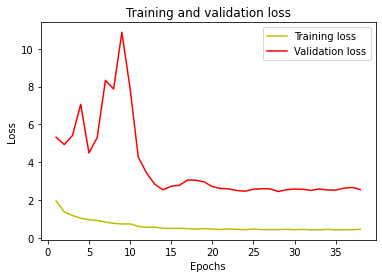

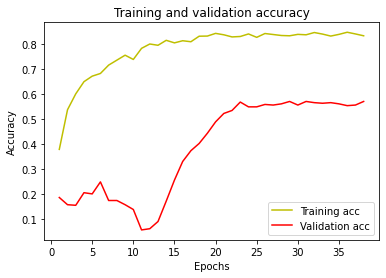

In [ ]:
loss = history_Resnet.history['loss']
val_loss = history_Resnet.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_Resnet.history['categorical_accuracy']
val_acc = history_Resnet.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **DenseNet**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D

## Model

In [ ]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(9,activation='softmax')(x) #FC-layer

den_model=tf.keras.Model(inputs=model_d.input,outputs=preds)
den_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_8 (ZeroPadding2  (None, 134, 134, 3)  0          ['input_6[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_8[0][0]']       
                                                                                            

## Compiling the model

In [ ]:
den_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) , 
              loss = tf.keras.losses.categorical_crossentropy, 
              metrics=[tf.keras.metrics.categorical_accuracy]
              )

## Training the model

In [ ]:
# Train the model
callbacksX = [EarlyStopping(patience = 10), 
              ModelCheckpoint("./ISIC/model-Densenet-{epoch:02d}.h5", monitor='val_loss',
                               verbose=1, save_best_only=True),
              ReduceLROnPlateau(monitor='val_loss',
                                factor=0.1, patience=5, min_lr=1e-7)] 
history_DenseNet = den_model.fit(train_ds,validation_data=valid_ds, epochs=100, verbose=2, callbacks=callbacksX,steps_per_epoch = 1795 // batch_size,
                              validation_steps = 444 // batch_size)

Epoch 1/100

Epoch 1: val_loss improved from inf to 2.20319, saving model to ./ISIC/model-Densenet-01.h5
56/56 - 54s - loss: 2.9557 - categorical_accuracy: 0.1894 - val_loss: 2.2032 - val_categorical_accuracy: 0.1851 - lr: 1.0000e-04 - 54s/epoch - 969ms/step
Epoch 2/100

Epoch 2: val_loss improved from 2.20319 to 2.06727, saving model to ./ISIC/model-Densenet-02.h5
56/56 - 41s - loss: 2.3249 - categorical_accuracy: 0.3301 - val_loss: 2.0673 - val_categorical_accuracy: 0.2933 - lr: 1.0000e-04 - 41s/epoch - 737ms/step
Epoch 3/100

Epoch 3: val_loss improved from 2.06727 to 1.83540, saving model to ./ISIC/model-Densenet-03.h5
56/56 - 42s - loss: 2.0002 - categorical_accuracy: 0.4243 - val_loss: 1.8354 - val_categorical_accuracy: 0.4135 - lr: 1.0000e-04 - 42s/epoch - 754ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 1.83540
56/56 - 38s - loss: 1.8404 - categorical_accuracy: 0.4589 - val_loss: 1.8712 - val_categorical_accuracy: 0.4207 - lr: 1.0000e-04 - 38s/epoch - 685ms/step
E

## Testing the model

In [ ]:
# Test model
directory = test_path

test_gen = ImageDataGenerator(rescale=1./255) 
test = test_gen.flow_from_directory(directory,
                                         target_size=(128,128),
                                         batch_size=32,
                                         class_mode = 'categorical')
# Evaluate on test data
scores = den_model.evaluate(test)
print("%s%s: %.2f%%" % ("evaluate ",den_model.metrics_names[1], scores[1]*100))

Found 118 images belonging to 9 classes.
4/4 [==============================] - 8s 2s/step - loss: 2.4247 - categorical_accuracy: 0.4831
evaluate categorical_accuracy: 48.31%


## Ploting the graph

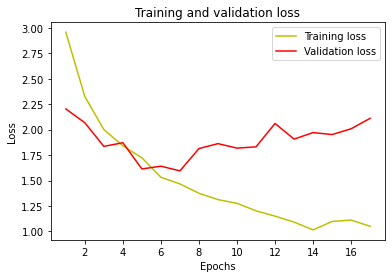

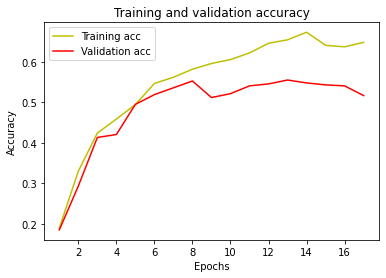

In [ ]:
loss = history_DenseNet.history['loss']
val_loss = history_DenseNet.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_DenseNet.history['categorical_accuracy']
val_acc = history_DenseNet.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()